![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 16 - Clustering</center>
### <center> K-Means - Solution </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/16_ParametricClustering/MainKMeans_Solution.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

np.random.seed(1)

### Exercise (SuperPixels):
* Load the `Fruits.jpeg` image and covert it to NumPy ndarray `mI`:
$$\boldsymbol{I}\in\mathbb{R}^{\text{height}\times\text{width}\times3}$$
* Use the LAB color space (instead of RGB) (`mLAB`).
* Create a new "image" `mX` such that:
$$\boldsymbol{X}\in\mathbb{R}^{\text{height}\times\text{width}\times5}$$
where:
    * The first 3 channels are the LAB image.
    * The 4th channel is the $x$ position.
    * The 5th channel is the $y$ position.
* Apply K-Means to the pixels of `mx`
* Create a mask image `mMask` such that:
$$\boldsymbol{M}\in\mathbb{R}^{\text{height}\times\text{width}}$$
where each pixel in `mMask` is the cluster label of the corresponding pixel in `mI`.
* Plot the segmentation (Superpixels) map.

**Tip:** Try different weights for the LAB image and the XY position.

#### Load image:

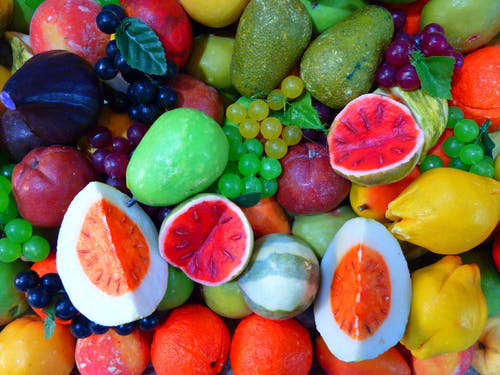

In [2]:
from PIL import Image
oImage = Image.open('Fruits.jpeg')
oImage

In [3]:
mI = np.array(oImage)
mI.shape

(375, 500, 3)

#### Conver to LAB color space:

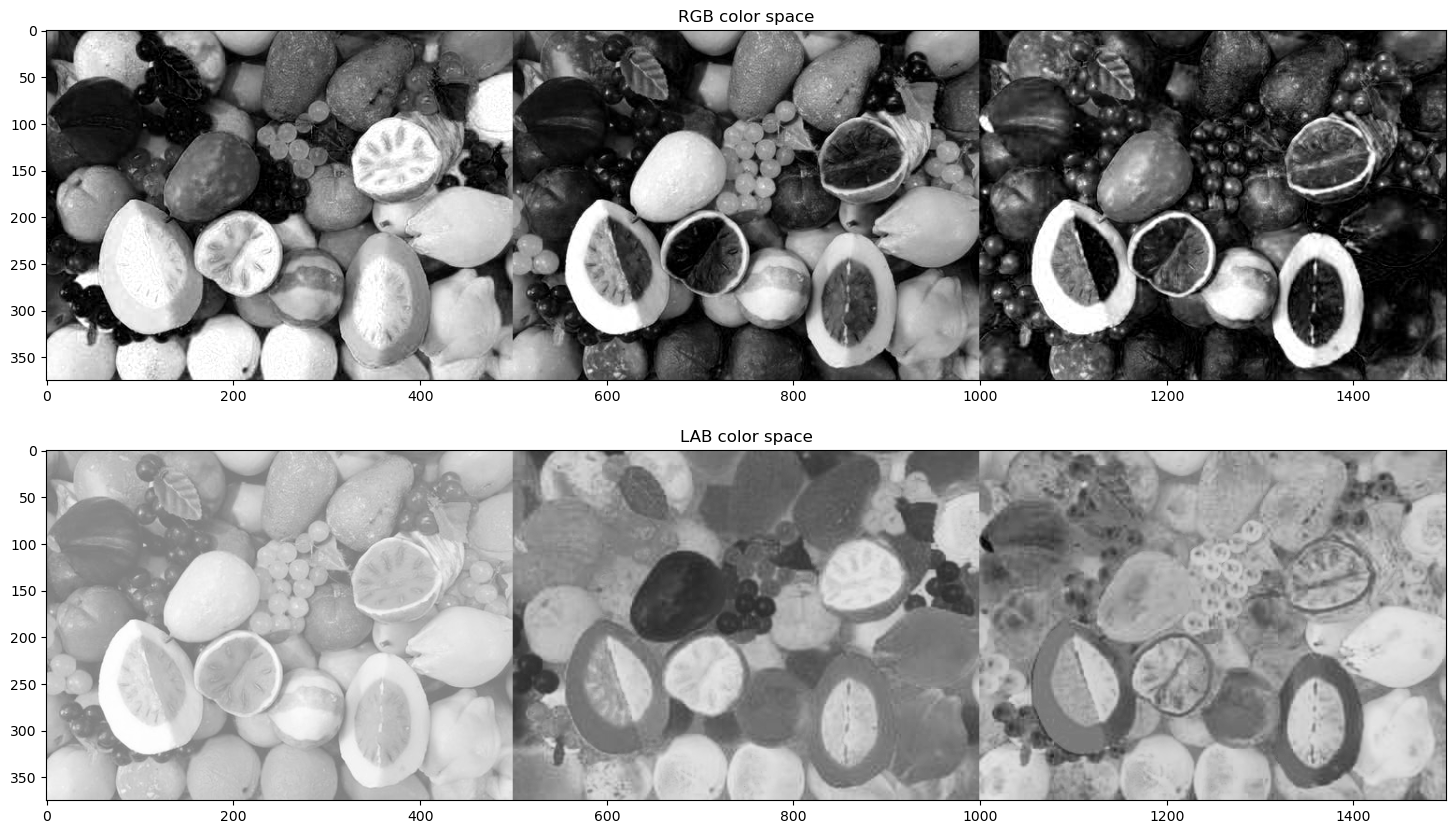

In [4]:
from skimage import color

mLAB = color.rgb2lab(mI)

_, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].imshow(np.c_[mI  [:,:,0], mI  [:,:,1], mI  [:,:,2]], cmap='gray'); ax[0].set_title('RGB color space')
ax[1].imshow(np.c_[mLAB[:,:,0], mLAB[:,:,1], mLAB[:,:,2]], cmap='gray'); ax[1].set_title('LAB color space')
plt.show    ()

#### Create `mX`:
Make sure `mX.shape = (375, 500, 5)`

In [10]:
height, width, _ = mI.shape
vX               = np.arange  (width)
vY               = np.arange  (height)
mXX, mYY         = np.meshgrid(vX, vY)
mX               = np.dstack  ([1.5 * mLAB, mXX, mYY])
mX.shape

(375, 500, 5)

#### Fit a K-Means model:
Hint: consider using `np.reshape`

In [11]:
from sklearn.cluster import KMeans

mP      = np.reshape(mX, (-1, 5))
oKMeans = KMeans(n_clusters=35, n_init=3).fit(mP)

#### Create mask (apply the model):
Hint: consider using `oKMeans.predict`

In [12]:
vMask = oKMeans.predict(mP)
mMask = np.reshape(vMask, (height, width))

#### Plot:

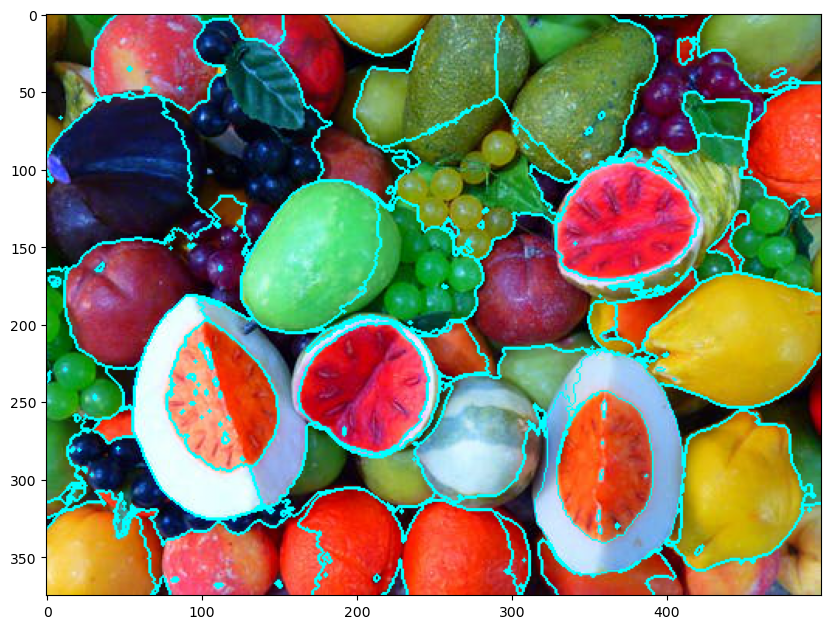

In [14]:
from skimage.segmentation import mark_boundaries

mO = mark_boundaries(mI, mMask, color=(0,1,1))

plt.figure(figsize=(10, 8))
plt.imshow(mO)
plt.show  ()